<left>
    <h4>XGBOOST</h4>
</left>

---

✅ Data loaded:
       seqn         berat        tinggi           bmi           age  fgb  \
0  130378.0  3.190000e+15  9.030000e+15 -8.730000e+14 -2.570000e+15  627   
1  130379.0  8.420000e+15  5.380000e+15  6.490000e+15  4.000000e+00   55   
2  130380.0 -2.950000e+16 -9.310000e+15  2.170000e+15 -2.290000e+16  866   
3  130386.0  4.490000e+16  4.760000e+16  2.710000e+14 -5.140000e+15  555   
4  130387.0  9.020000e+15 -7.240000e+15  1.660000e+16  4.570000e+16   59   

   hba1c  insulin  avg_systolyc  avg_dystolyc           hdl        status  \
0     56     9318  6.590000e+15  1.420000e+16 -4.090000e+15   Prediabetes   
1     56    11946 -9.090000e+15  1.940000e+15  4.770000e+14  Non-diabetes   
2     62     9798 -4.090000e+15  3.230000e+15 -1.590000e+16      Diabetes   
3     51     6828  2.270000e+16  9.680000e+14 -3.410000e+15  Non-diabetes   
4   1360      740  1.270000e+16  3.230000e+15 -5.680000e+14      Diabetes   

    insulin_log  
0  6.000000e+15  
1  1.120000e+16  
2  7.060000

c:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:26:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Classification Report ===
              precision    recall  f1-score   support

    Diabetes       0.97      0.95      0.96       584
Non-diabetes       0.85      0.95      0.89       584
 Prediabetes       0.92      0.84      0.88       585

    accuracy                           0.91      1753
   macro avg       0.91      0.91      0.91      1753
weighted avg       0.91      0.91      0.91      1753

🎯 Accuracy: 0.9104


c:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


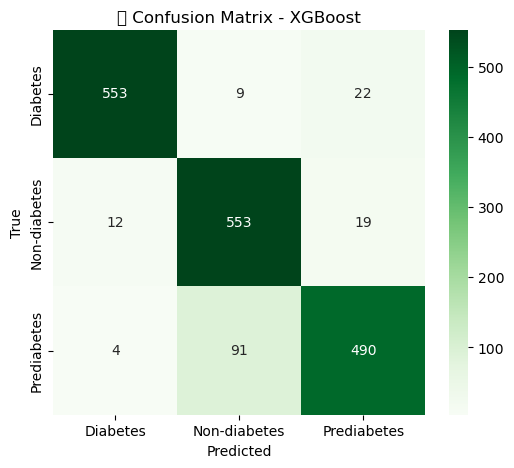

In [12]:
# ==============================================
# 🚀 XGBOOST CLASSIFIER (Tanpa Hypertuning)
# ==============================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance

# --- 1. Load dan cleaning data ---
df = pd.read_csv("../Dataset/data_scaled_clean.csv", sep=';')
df = df.replace(',', '.', regex=True)
df.columns = df.columns.str.strip().str.lower()

for col in df.columns:
    if col != 'status':
        df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

print("✅ Data loaded:")
print(df.head())

# --- 2. Pisahkan fitur dan label ---
X = df.drop(columns=['status', 'hba1c', 'berat', 'tinggi', 'hdl'], errors='ignore')
y = df['status']

# --- 3. Encode label ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\nLabel mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# --- 4. SMOTE untuk balance kelas ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)
# --- 🔍 Cek hasil oversampling ---
print("\n=== Distribusi Kelas Setelah SMOTE ===")
unique, counts = np.unique(y_resampled, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u} ({le.inverse_transform([u])[0]}): {c}")

print(f"\nTotal data setelah SMOTE: {len(y_resampled)} sampel")

# --- 5. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# --- 6. Normalisasi fitur ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 7. Model dasar XGBoost ---
model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# --- 8. Training ---
print("\n🚀 Training XGBoost model...")
model.fit(X_train_scaled, y_train)

# --- 9. Evaluasi ---
y_pred = model.predict(X_test_scaled)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# --- 10. Visualisasi Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('🧩 Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




<left>
    <h4>XGBOOST WITH HYPERTUNING RANDOMSEARCH</h4>
</left>

---

✅ Data cleaned:
       seqn         berat        tinggi           bmi           age  fgb  \
0  130378.0  3.190000e+15  9.030000e+15 -8.730000e+14 -2.570000e+15  627   
1  130379.0  8.420000e+15  5.380000e+15  6.490000e+15  4.000000e+00   55   
2  130380.0 -2.950000e+16 -9.310000e+15  2.170000e+15 -2.290000e+16  866   
3  130386.0  4.490000e+16  4.760000e+16  2.710000e+14 -5.140000e+15  555   
4  130387.0  9.020000e+15 -7.240000e+15  1.660000e+16  4.570000e+16   59   

   hba1c  insulin  avg_systolyc  avg_dystolyc           hdl        status  \
0     56     9318  6.590000e+15  1.420000e+16 -4.090000e+15   Prediabetes   
1     56    11946 -9.090000e+15  1.940000e+15  4.770000e+14  Non-diabetes   
2     62     9798 -4.090000e+15  3.230000e+15 -1.590000e+16      Diabetes   
3     51     6828  2.270000e+16  9.680000e+14 -3.410000e+15  Non-diabetes   
4   1360      740  1.270000e+16  3.230000e+15 -5.680000e+14      Diabetes   

    insulin_log  
0  6.000000e+15  
1  1.120000e+16  
2  7.06000

c:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:23:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🏆 Best Hyperparameters:
{'colsample_bytree': 0.7434587125184655, 'gamma': 0.12708182453486938, 'learning_rate': 0.06905811768378775, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 203, 'subsample': 0.8788062963981071}

=== Classification Report ===
              precision    recall  f1-score   support

    Diabetes       0.98      0.95      0.96       584
Non-diabetes       0.85      0.96      0.90       584
 Prediabetes       0.93      0.84      0.88       585

    accuracy                           0.91      1753
   macro avg       0.92      0.91      0.91      1753
weighted avg       0.92      0.91      0.91      1753

🎯 Accuracy: 0.9139


c:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


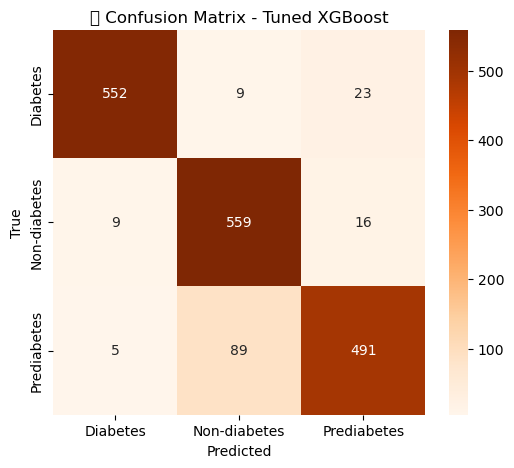

In [11]:
# ==============================================
# ⚙️ XGBOOST + RANDOMIZED SEARCH HYPERTUNING
# ==============================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Load data dan cleaning ---
df = pd.read_csv("../Dataset/data_scaled_clean.csv", sep=';')
df = df.replace(',', '.', regex=True)
df.columns = df.columns.str.strip().str.lower()

for col in df.columns:
    if col != 'status':
        df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

print("✅ Data cleaned:")
print(df.head())

# --- 2. Fitur dan Label ---
X = df.drop(columns=['status', 'hba1c','berat', 'tinggi', 'hdl'], errors='ignore')
y = df['status']

# --- 3. Encode label ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 4. SMOTE ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)
# --- 🔍 Cek hasil oversampling ---
print("\n=== Distribusi Kelas Setelah SMOTE ===")
unique, counts = np.unique(y_resampled, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u} ({le.inverse_transform([u])[0]}): {c}")

print(f"\nTotal data setelah SMOTE: {len(y_resampled)} sampel")

# --- 5. Split train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# --- 6. Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 7. Base model ---
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# --- 8. Hyperparameter Space ---
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'min_child_weight': randint(1, 6)
}

# --- 9. RandomizedSearchCV ---
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

print("\n🚀 Training XGBoost with RandomizedSearchCV ...")
random_search.fit(X_train_scaled, y_train)

# --- 10. Best Params ---
print("\n🏆 Best Hyperparameters:")
print(random_search.best_params_)

# --- 11. Evaluate Best Model ---
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# --- 12. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('🧩 Confusion Matrix - Tuned XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


